In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/20122021-adana-hourly/hourly data.csv
/kaggle/input/1884-2021-adana/1984_2021.csv


In [20]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from pandas import concat
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import concatenate
from sklearn.model_selection import train_test_split
import seaborn as sns
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU,Bidirectional,SimpleRNN
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
url= '/kaggle/input/1884-2021-adana/1984_2021.csv'
#IMPORT DATASET

data= pd.read_csv(url,sep=';')
print(data)

#RENAME COLUMNS

data.rename(columns={'ALLSKY_SFC_SW_DWN':'GHI','ALLSKY_KT':'insolation_clearness','T2M':'temperature','T2M_MAX':'max_temperature','T2M_MIN':'min_temperature','TS':'soil_temperature','RH2M':'relative_humidity','PRECTOTCORR':'precipitation','PS':'pressure','WS10M':'wind_speed','WD10M':'wind_direction'},inplace= True)
data.describe()

#DATA CLEANSING

#REMOVE DUPLICATES
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

#REMOVE OUTLIERS
from scipy import stats
data= data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


#HANDLE MISSING VALUES
data= data.interpolate(method ='linear', limit_direction ='both')

print(data.describe().transpose())

train_data = data[data['YEAR'] < 2010]
test_data = data[data['YEAR'] >= 2010]
#data=data.astype(float)
#DEFINE X AND Y

#x= data.drop(['GHI'],axis=1).values
#x= data.values
#x=np.delete(x,-1,0)
#x= data.drop(['wind_direction','wind_speed','precipitation','DY','MO','YEAR'],axis=1).values #FEATURES SELECTION

#x=data[['GHI','max_temperature','temperature','soil_temperature','min_temperature','relative_humidity']].values
y=data['GHI'].values
x = data.values

#y=np.delete(y,0,0)
#y= data.iloc[1:,3].values
#x=data.iloc[:-1,:].values

#SHIFT DATA FOR ONE DAY
from scipy.ndimage.interpolation import shift
y = shift(y, -1, cval=0)
y=np.delete(y,-1,0)
x=np.delete(x,-1,0)




print(x)
print(y)

#SPLIT THE DATASET INTO TRAINING AND TESTING DATASET

#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)
y_train= y[:10603]
y_test= y[10603:]
x_train= x[:10603]
x_test= x[10603:]


#DATA NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
xscaler = MinMaxScaler(feature_range = (0, 1))
yscaler = MinMaxScaler(feature_range = (0, 1))
x= yscaler.fit_transform(x)
y= yscaler.fit_transform(y.reshape(-1, 1))

#EVALUATE THE MODEL
def evaluate(y_pred,y_test):
    #DATA DENORMALIZATION
    y_test= yscaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred= yscaler.inverse_transform(y_pred.reshape(-1, 1))

    #CALCULATE R2
    from sklearn.metrics import r2_score
    r2= r2_score(y_test, y_pred)

    #CALCULATE MAPE
    from sklearn.metrics import mean_absolute_percentage_error
    mape= mean_absolute_percentage_error(y_test,y_pred)

    #CALCULATE MAE
    from sklearn.metrics import mean_absolute_error
    mae= mean_absolute_error(y_test,y_pred)

    #CALCULATE RMSE
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    #CALCULATE nRMSE
    nrmse= rmse/ np.mean(y_test)

    print(r2,mape,mae,rmse, nrmse)
    
#PLOT THE RESULTS
def plot(y_pred,y_test):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,6))
    #plt.title('MLR Model')
    plt.xlabel('Day', fontsize=18)
    plt.ylabel('GHI(kWh/m^2) ', fontsize=18)
    plt.plot(y_test[-365:])
    plt.plot(y_pred[-365:])
    plt.legend(['Original',  'Prediction'], loc='upper right')
    plt.show()
    
e=100

       YEAR  MO  DY  ALLSKY_SFC_SW_DWN  ALLSKY_KT    T2M  T2M_MAX  T2M_MIN  \
0      1984   1   1               2.00       0.47   7.85    13.01     2.95   
1      1984   1   2               2.71       0.63   9.37    16.20     4.84   
2      1984   1   3               2.84       0.66  10.09    16.29     5.04   
3      1984   1   4               2.90       0.67   9.48    14.80     5.88   
4      1984   1   5               2.23       0.52   8.64    13.04     5.32   
...     ...  ..  ..                ...        ...    ...      ...      ...   
13875  2021  12  27               2.46       0.59   7.90    14.49     3.41   
13876  2021  12  28               2.01       0.48   7.31    12.20     4.36   
13877  2021  12  29               2.35       0.55   7.80    13.26     4.03   
13878  2021  12  30               1.43       0.34   7.15    11.73     4.21   
13879  2021  12  31               2.25       0.53   8.51    14.15     4.53   

         TS   RH2M  PRECTOTCORR     PS  WS10M   WD10M  
0      

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13254 entries, 0 to 13879
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  13254 non-null  int64  
 1   MO                    13254 non-null  int64  
 2   DY                    13254 non-null  int64  
 3   GHI                   13254 non-null  float64
 4   insolation_clearness  13254 non-null  float64
 5   temperature           13254 non-null  float64
 6   max_temperature       13254 non-null  float64
 7   min_temperature       13254 non-null  float64
 8   soil_temperature      13254 non-null  float64
 9   relative_humidity     13254 non-null  float64
 10  precipitation         13254 non-null  float64
 11  pressure              13254 non-null  float64
 12  wind_speed            13254 non-null  float64
 13  wind_direction        13254 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 1.5 MB


In [22]:
#data.to_csv('dataset',index= False)
#pd.DataFrame(x_train).to_csv('x_train',index= False)
#pd.DataFrame(y_train).to_csv('y_train',index= False)
#pd.DataFrame(x_test).to_csv('x_test',index= False)
#pd.DataFrame(y_test).to_csv('y_test',index= False)
#pd.DataFrame(y).to_csv('y',index= False)
#pd.DataFrame(x).to_csv('x',index= False)

0.8255312170478306 0.2031398923058446 5.5852533398139625 7.506661669604852 0.17526002633713317


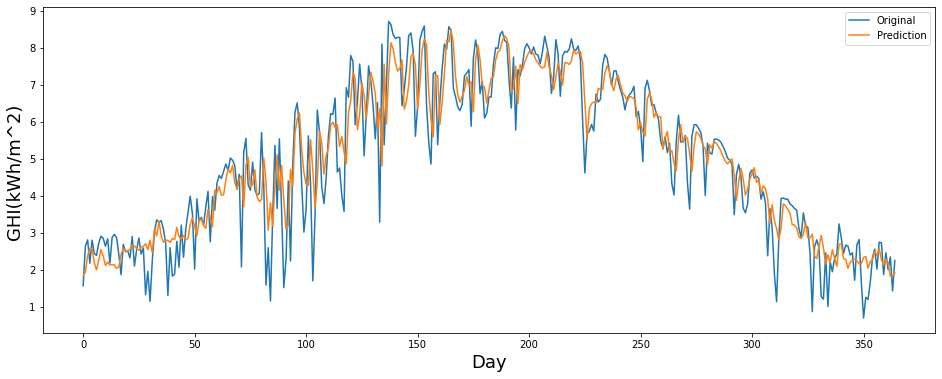

In [23]:
#TRAIN MLR MODEL

from sklearn.linear_model import LinearRegression
mlr= LinearRegression(copy_X= True, fit_intercept= True, n_jobs= True, positive= False)
mlr.fit(x_train,y_train)

#MLR PREDICTION
mlr_pred= mlr.predict(x_test)

#MLR RESULTS

evaluate(mlr_pred,y_test)
plot(mlr_pred,y_test)

2022-09-30 17:52:32.843513: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 1872.5792
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 12.3377
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 7.5285
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 4.9830
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 3.5909
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 2.8608
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 2.4191
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 2.1713
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 2.0097
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 1.8665
Epoch 11/100
83/83 [==============================] - 0s 1ms/step - loss: 1.7730
Epoch 12/100
83/83 [==============================] - 0s 1ms/step - loss: 1.6849
Epoch 13/100
83/83 [=============

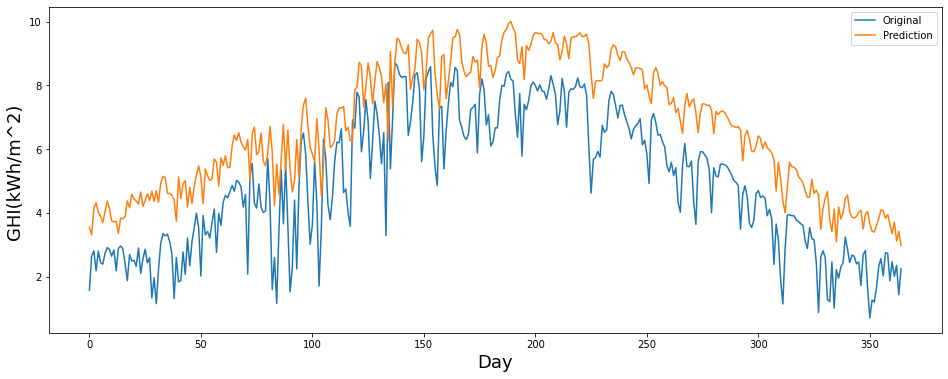

In [24]:
# Build the MLP model

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100,activation='relu'))

model.add(Dense(1))

# Compile the model
model.compile(optimizer='Adam',loss='mse')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=e)
# Get the models predicted price values 
mlp_pred = model.predict(x_test)

#MLP RESULTS

evaluate(mlp_pred,y_test)
plot(mlp_pred,y_test)

In [25]:

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#x_train = np.reshape(x_train, (x_train.shape[0],1,1))
#x_test = np.reshape(x_test, (x_test.shape[0],1,1))



In [26]:
# Build the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(100,return_sequences=False, input_shape= (x_train.shape[1], x_train.shape[2]),activation='tanh'))

model.add(Dense(1))

# Compile the model
model.compile(optimizer='Adam',loss='mse')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=e)
# Get the models predicted price values 
rnn_pred = model.predict(x_test)

#RNN RESULTS

evaluate(rnn_pred,y_test)
plot(rnn_pred,y_test)

Epoch 1/100
83/83 [==============================] - 2s 10ms/step - loss: 5.0381
Epoch 2/100
83/83 [==============================] - 1s 11ms/step - loss: 2.5805
Epoch 3/100
83/83 [==============================] - 1s 11ms/step - loss: 1.4733
Epoch 4/100
83/83 [==============================] - 1s 10ms/step - loss: 1.0751
Epoch 5/100
83/83 [==============================] - 1s 10ms/step - loss: 1.0078
Epoch 6/100
83/83 [==============================] - 1s 11ms/step - loss: 0.9691
Epoch 7/100
83/83 [==============================] - 1s 10ms/step - loss: 0.9680
Epoch 8/100
83/83 [==============================] - 1s 11ms/step - loss: 0.9089
Epoch 9/100
83/83 [==============================] - 1s 11ms/step - loss: 0.9005
Epoch 10/100
83/83 [==============================] - 1s 11ms/step - loss: 0.9027
Epoch 11/100
83/83 [==============================] - 1s 10ms/step - loss: 0.8754
Epoch 12/100
83/83 [==============================] - 1s 10ms/step - loss: 0.8811
Epoch 13/100
83/83 [=====

KeyboardInterrupt: 

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100,return_sequences=False, input_shape= (x_train.shape[1], 1)))
#model.add(LSTM(100,return_sequences=False, input_shape= (x_train.shape[1], 1)))

model.add(Dense(1))

# Compile the model
model.compile(optimizer='Adam',loss='mse')

# Train the model
model.fit(x_train, y_train, batch_size=512, epochs=e,callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])
# Get the models predicted price values 
lstm_pred = model.predict(x_test)

#LSTM RESULTS

evaluate(lstm_pred,y_test)
plot(lstm_pred,y_test)

In [ ]:
#Build the BiLSTM model
model = Sequential()

model.add(Bidirectional(LSTM(100, return_sequences=False), input_shape= (x_train.shape[1], 1)))

model.add(Dense(1))

#Compile the model
model.compile(optimizer='Adam',loss='mse')

#Train the model
model.fit(x_train, y_train, batch_size=128, epochs=e,callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])

#Get the models predicted values
bilstm_pred = model.predict(x_test)

#BILSTM RESULTS

evaluate(bilstm_pred,y_test)
plot(bilstm_pred,y_test)

Epoch 1/100
83/83 [==============================] - 4s 23ms/step - loss: 38.7587
Epoch 2/100
83/83 [==============================] - 2s 23ms/step - loss: 1.3444
Epoch 3/100
83/83 [==============================] - 2s 23ms/step - loss: 1.3535
Epoch 4/100
83/83 [==============================] - 2s 24ms/step - loss: 1.1811
Epoch 5/100
83/83 [==============================] - 2s 23ms/step - loss: 1.1765
Epoch 6/100
83/83 [==============================] - 2s 23ms/step - loss: 1.2415
Epoch 7/100
83/83 [==============================] - 2s 23ms/step - loss: 1.2542
Epoch 8/100
83/83 [==============================] - 2s 23ms/step - loss: 1.2170
Epoch 9/100
83/83 [==============================] - 2s 23ms/step - loss: 1.1553
Epoch 10/100
83/83 [==============================] - 2s 24ms/step - loss: 1.3557
Epoch 11/100
83/83 [==============================] - 2s 24ms/step - loss: 1.1338
Epoch 12/100
83/83 [==============================] - 2s 23ms/step - loss: 1.2404
Epoch 13/100
83/83 [====

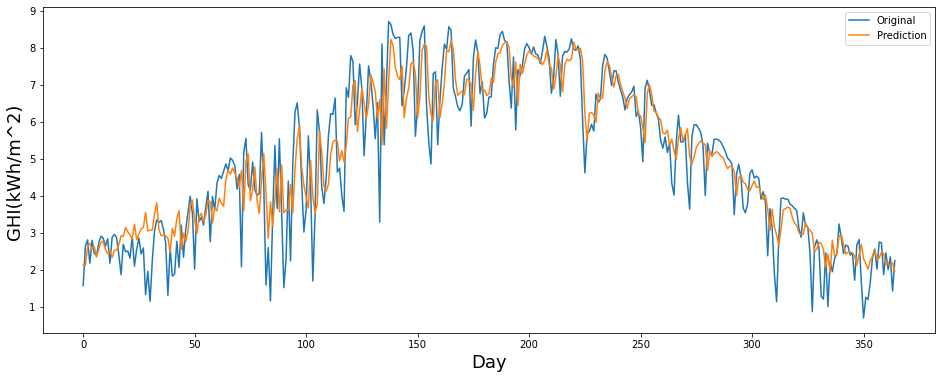

In [27]:
# Build GRU model
model = Sequential()
model.add(GRU(100,return_sequences=False, input_shape= (x_train.shape[1], x_train.shape[2]),activation='relu'))

model.add(Dense(1))

# Compile the model
model.compile(optimizer='Adam',loss='mse')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=e)
# Get the models predicted price values 
gru_pred = model.predict(x_test)

#GRU RESULTS

evaluate(gru_pred,y_test)
plot(gru_pred,y_test)

In [ ]:
# Build the BiGRU model
model = Sequential()

model.add(Bidirectional(GRU(100, return_sequences=False), input_shape= (x_train.shape[1], 1)))

model.add(Dense(1))

# Compile the model
model.compile(optimizer='Adam',loss='mse')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=e,callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])
# Get the models predicted price values 
bigru_pred = model.predict(x_test)

#BIGRU RESULTS

evaluate(bigru_pred,y_test)
plot(bigru_pred,y_test)